# IMPORTS

In [1]:
import numpy as np
import pandas as pd
import re
import string
import emoji
import matplotlib.pyplot as plt

from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

%matplotlib inline

# Settings for better readabilty and shuting down tensorflow warnings
     
    Run cell below only once.

In [2]:
pd.set_option('display.max_colwidth', -1) 

# Load And analyse the dataset we created by extracting tweets from twitter using Tweepy API

In [3]:
Tweets = pd.read_csv("TweetlabelledFinal.csv")
Tweets.head(10)

,ID,Date- Time,User_Name,Tweet,Sentiment
0,1286896213657346050,2020-07-25 05:29:01,BALLl,"i need to make my own SapceX, some people dont deserve to live here",positive
1,1286905185273610241,2020-07-25 06:04:40,T:HE:JAMES. HMRH,"Thre was mention of this earlier, the infraction on the views of the cosmos from the SapceX array and how astronomy would compensate. https://t.co/I5omeFq4SM",neutral
2,1287391022218006531,2020-07-26 14:15:12,Anshi Pathak,@bhab005 @KanganaTeam @kunalpande8 Sachine Tendulkar handle his account and but here kangana team handles her. That's the difference here. And if she is doing that what's funny. She has earned that right. Also Jo log khud nahi bolte h wo dusron se bulwate Hain. Wo khud bol rahi h to galat. Kya h.,positive
3,1287495418180501505,2020-07-26 21:10:02,Goodauld69th,Mainly stoltenberg scandanavian cowardly attacks oil pipe lines then running like weird inbred fish savages to underground bunkers i wont dive into it but that world is over and like nazis there being spitefull and abusive and fucking everything up because there dumb inbreds,negative
4,1287731665452769280,2020-07-27 12:48:48,Sardar Khan,@gareebscientist @GauravG91 @Chandel1402 @isro @SpaceX He I mean... Vaibhav....spacex is doing great work.. But its unfair to compare two.. No offense to sapcex but I will chose ISRO over spacex AnyDay....,negative
5,1287756489428353025,2020-07-27 14:27:27,guapdaddy 3000,someone get me the panda pegion nike sb,neutral
6,1287756655413911554,2020-07-27 14:28:06,who?????me,"Piers Morgan, A Scum Media ""Star"" Showing His Spitefull Side. What a Pathetic Little Man. https://t.co/fKIRzd7aGE",negative
7,1287773079675056128,2020-07-27 15:33:22,The Great Gay Trainwreck,Old PC game skyboxes emit such elegiac auras\njust look at like\nThe skybox from the Harry potter 2 qudditch area,negative
8,1287775000041271296,2020-07-27 15:41:00,Dawood Javed,"""Fantastic Beasts: The Crimes of Grindelwald, Gellert Grindelwald plans to raise an army of wizards to rule over non-magical beings. In response, Newt Scamander's former professor, Albus Dumbledore, seeks his help to stop him.""\n#FantasticBeastsTheCrimesOfGrindelwald https://t.co/KmVVV9z7FB",positive
9,1287808107817689090,2020-07-27 17:52:33,Xavier Dolanigga,@Selinakyle981 @filmsbyzoe also Kit Harrigton is good in this movie. I don't care what anybody says.,positive


In [4]:
Tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29348 entries, 0 to 29347
Data columns (total 5 columns):
ID            29348 non-null int64
Date- Time    29348 non-null object
User_Name     29345 non-null object
Tweet         29348 non-null object
Sentiment     29348 non-null object
dtypes: int64(1), object(4)
memory usage: 1.1+ MB


In [5]:
Tweets.groupby('Sentiment').count()

,ID,Date- Time,User_Name,Tweet
Sentiment,,,,
negative,9468,9468,9468,9468
neutral,9587,9587,9584,9587
positive,10293,10293,10293,10293


    The dataset contains attributes : Tweet , tweet id , data time , username & sentiment , out of these we only need
    tweet and sentiment for our supervised machine learning classification algorithm

In [6]:
Tweets = Tweets[['Tweet','Sentiment']]
Tweets.head(10)

,Tweet,Sentiment
0,"i need to make my own SapceX, some people dont deserve to live here",positive
1,"Thre was mention of this earlier, the infraction on the views of the cosmos from the SapceX array and how astronomy would compensate. https://t.co/I5omeFq4SM",neutral
2,@bhab005 @KanganaTeam @kunalpande8 Sachine Tendulkar handle his account and but here kangana team handles her. That's the difference here. And if she is doing that what's funny. She has earned that right. Also Jo log khud nahi bolte h wo dusron se bulwate Hain. Wo khud bol rahi h to galat. Kya h.,positive
3,Mainly stoltenberg scandanavian cowardly attacks oil pipe lines then running like weird inbred fish savages to underground bunkers i wont dive into it but that world is over and like nazis there being spitefull and abusive and fucking everything up because there dumb inbreds,negative
4,@gareebscientist @GauravG91 @Chandel1402 @isro @SpaceX He I mean... Vaibhav....spacex is doing great work.. But its unfair to compare two.. No offense to sapcex but I will chose ISRO over spacex AnyDay....,negative
5,someone get me the panda pegion nike sb,neutral
6,"Piers Morgan, A Scum Media ""Star"" Showing His Spitefull Side. What a Pathetic Little Man. https://t.co/fKIRzd7aGE",negative
7,Old PC game skyboxes emit such elegiac auras\njust look at like\nThe skybox from the Harry potter 2 qudditch area,negative
8,"""Fantastic Beasts: The Crimes of Grindelwald, Gellert Grindelwald plans to raise an army of wizards to rule over non-magical beings. In response, Newt Scamander's former professor, Albus Dumbledore, seeks his help to stop him.""\n#FantasticBeastsTheCrimesOfGrindelwald https://t.co/KmVVV9z7FB",positive
9,@Selinakyle981 @filmsbyzoe also Kit Harrigton is good in this movie. I don't care what anybody says.,positive


    As the sentiment is given in string format we need to convert them into numerical values which will serve as the
    class labels for the supervised machine learning algorithm.

In [7]:
Sentiment = {'negative': 0,'positive': 1,'neutral' : 2}
Tweets.Sentiment = [Sentiment[item] for item in Tweets.Sentiment]
Tweets.head(10)

,Tweet,Sentiment
0,"i need to make my own SapceX, some people dont deserve to live here",1
1,"Thre was mention of this earlier, the infraction on the views of the cosmos from the SapceX array and how astronomy would compensate. https://t.co/I5omeFq4SM",2
2,@bhab005 @KanganaTeam @kunalpande8 Sachine Tendulkar handle his account and but here kangana team handles her. That's the difference here. And if she is doing that what's funny. She has earned that right. Also Jo log khud nahi bolte h wo dusron se bulwate Hain. Wo khud bol rahi h to galat. Kya h.,1
3,Mainly stoltenberg scandanavian cowardly attacks oil pipe lines then running like weird inbred fish savages to underground bunkers i wont dive into it but that world is over and like nazis there being spitefull and abusive and fucking everything up because there dumb inbreds,0
4,@gareebscientist @GauravG91 @Chandel1402 @isro @SpaceX He I mean... Vaibhav....spacex is doing great work.. But its unfair to compare two.. No offense to sapcex but I will chose ISRO over spacex AnyDay....,0
5,someone get me the panda pegion nike sb,2
6,"Piers Morgan, A Scum Media ""Star"" Showing His Spitefull Side. What a Pathetic Little Man. https://t.co/fKIRzd7aGE",0
7,Old PC game skyboxes emit such elegiac auras\njust look at like\nThe skybox from the Harry potter 2 qudditch area,0
8,"""Fantastic Beasts: The Crimes of Grindelwald, Gellert Grindelwald plans to raise an army of wizards to rule over non-magical beings. In response, Newt Scamander's former professor, Albus Dumbledore, seeks his help to stop him.""\n#FantasticBeastsTheCrimesOfGrindelwald https://t.co/KmVVV9z7FB",1
9,@Selinakyle981 @filmsbyzoe also Kit Harrigton is good in this movie. I don't care what anybody says.,1


# Cleaning Data

        From the tweets we need to remove:
        1. mentions or usernames : @abcd
        2. Hashtags : #happy --> happy
        3. convert all tweets in Lowercase :
                this is done because upeercase and lower case charecters are treated as differnt as a result 
                while converting a word in vector , same words may give different vectors if the casing of the letters
                in the words varies.
        4. Remove extra white spaces
        5. Remove numbers/digits
        6. Remove Hyperlinks
        7. Remove New Lines
        
         re.sub(r'@[A-za-z0-9]+','',text) :
            r: tells python the text is raw text
            @[A-za-z0-9]+ : any pattern starting with @ and followed by letterts or alphabet one or more.
            
        'http?s:\/\/\S+' : remove http, '?s' means s may or may not be present folowwed by // till we  
                               get one or more white space denoted by'S+'

# Create a function to Clean the Tweets:

In [8]:
def cleanTxt(text):
    text= re.sub(r'@[A-za-z0-9]+','',text) # remove mentions
    text= re.sub(r'#','',text) # remove # from text
    text= re.sub(r'http?s:\/\/\S+','',text) # remove Hyperlink
    text= re.sub(r'\n',' ',text) # remove new line
    text = re.sub(r'\d+','', text) # remove numbers
    
    # remove punctuations and convert characters to lower case
    text = "".join([char.lower() for char in text if char not in string.punctuation]) 
    # substitute multiple whitespace with single whitespace
    # Also, removes leading and trailing whitespaces
    text = re.sub('\s+', ' ', text).strip()
    
    return text

# Appling CleanTxt to our Dataframe:

In [9]:
Tweets['Tweet'] = Tweets['Tweet'].apply(cleanTxt)
Tweets.head(40)

,Tweet,Sentiment
0,i need to make my own sapcex some people dont deserve to live here,1
1,thre was mention of this earlier the infraction on the views of the cosmos from the sapcex array and how astronomy would compensate,2
2,sachine tendulkar handle his account and but here kangana team handles her thats the difference here and if she is doing that whats funny she has earned that right also jo log khud nahi bolte h wo dusron se bulwate hain wo khud bol rahi h to galat kya h,1
3,mainly stoltenberg scandanavian cowardly attacks oil pipe lines then running like weird inbred fish savages to underground bunkers i wont dive into it but that world is over and like nazis there being spitefull and abusive and fucking everything up because there dumb inbreds,0
4,he i mean vaibhavspacex is doing great work but its unfair to compare two no offense to sapcex but i will chose isro over spacex anyday,0
5,someone get me the panda pegion nike sb,2
6,piers morgan a scum media star showing his spitefull side what a pathetic little man,0
7,old pc game skyboxes emit such elegiac auras just look at like the skybox from the harry potter qudditch area,0
8,fantastic beasts the crimes of grindelwald gellert grindelwald plans to raise an army of wizards to rule over nonmagical beings in response newt scamanders former professor albus dumbledore seeks his help to stop him fantasticbeaststhecrimesofgrindelwald,1
9,also kit harrigton is good in this movie i dont care what anybody says,1


# The Tweets Still contains Emoji 😉  

    we can either remove them or replace them with equivalent text as sometimes these emoji do carry valuable
    sentiments/information 
    example:
    The food was 😍 : the emoji suggest the food was good (positive sentiment)
    The food was 😑 : the emoji sugeest the food was bad or average (negative sentiment)
    without emoji the text "The food was" seems to be Neutral
    
    Therefore its better to retain the emoji by converting them to text in order to retain the actual sentiment 
    
    Note:
    while replcaing emoji , emoji that are represented by multiple words ex: Happy_face or red-heart
    so we also need to replace the "_", "-" with blank space.
    
    delimiters=("", "") : by default delimeters are : , : i.e the text for emoji will place between two colons
                          so replace the colon with single white space string.

In [10]:
def convertEmoji(text):
    text = emoji.demojize(text, delimiters=(" ", " "))
    text = text = re.sub(r'_',' ', text) # replace underscore with single white space
    text = text = re.sub(r'-',' ', text) # replace '-' with single white space
    text = re.sub('\s+',' ',text)
    #replacing emoji places single white spaces before and after which may lead to multiple white spaces,
    #hence replaced multiples white space with a single white space
    return text

# Appling emoji conversion to our dataframe:

In [11]:
Tweets['Tweet'] = Tweets['Tweet'].apply(convertEmoji)
Tweets.head(40)

,Tweet,Sentiment
0,i need to make my own sapcex some people dont deserve to live here,1
1,thre was mention of this earlier the infraction on the views of the cosmos from the sapcex array and how astronomy would compensate,2
2,sachine tendulkar handle his account and but here kangana team handles her thats the difference here and if she is doing that whats funny she has earned that right also jo log khud nahi bolte h wo dusron se bulwate hain wo khud bol rahi h to galat kya h,1
3,mainly stoltenberg scandanavian cowardly attacks oil pipe lines then running like weird inbred fish savages to underground bunkers i wont dive into it but that world is over and like nazis there being spitefull and abusive and fucking everything up because there dumb inbreds,0
4,he i mean vaibhavspacex is doing great work but its unfair to compare two no offense to sapcex but i will chose isro over spacex anyday,0
5,someone get me the panda pegion nike sb,2
6,piers morgan a scum media star showing his spitefull side what a pathetic little man,0
7,old pc game skyboxes emit such elegiac auras just look at like the skybox from the harry potter qudditch area,0
8,fantastic beasts the crimes of grindelwald gellert grindelwald plans to raise an army of wizards to rule over nonmagical beings in response newt scamanders former professor albus dumbledore seeks his help to stop him fantasticbeaststhecrimesofgrindelwald,1
9,also kit harrigton is good in this movie i dont care what anybody says,1


# Now the Text free from mentions/Usernames , # , Hyperlinks and emojis are replaced with their meanings

      also as the emoji are now converted to words , the sentiment of the tweet might change hence lets update 
      the sentiment accordingly

In [12]:
def get_tweet_sentiment(tweet): 
    
    # create TextBlob object of passed tweet text 
    analysis = TextBlob(tweet)
    # set sentiment 
    if analysis.sentiment.polarity > 0: 
        return 1
    elif analysis.sentiment.polarity == 0: 
        return 2
    else: 
        return 0

In [13]:
Tweets['Sentiment']= Tweets['Tweet'].apply(get_tweet_sentiment)
Tweets.head(10)

,Tweet,Sentiment
0,i need to make my own sapcex some people dont deserve to live here,1
1,thre was mention of this earlier the infraction on the views of the cosmos from the sapcex array and how astronomy would compensate,2
2,sachine tendulkar handle his account and but here kangana team handles her thats the difference here and if she is doing that whats funny she has earned that right also jo log khud nahi bolte h wo dusron se bulwate hain wo khud bol rahi h to galat kya h,1
3,mainly stoltenberg scandanavian cowardly attacks oil pipe lines then running like weird inbred fish savages to underground bunkers i wont dive into it but that world is over and like nazis there being spitefull and abusive and fucking everything up because there dumb inbreds,0
4,he i mean vaibhavspacex is doing great work but its unfair to compare two no offense to sapcex but i will chose isro over spacex anyday,0
5,someone get me the panda pegion nike sb,2
6,piers morgan a scum media star showing his spitefull side what a pathetic little man,0
7,old pc game skyboxes emit such elegiac auras just look at like the skybox from the harry potter qudditch area,0
8,fantastic beasts the crimes of grindelwald gellert grindelwald plans to raise an army of wizards to rule over nonmagical beings in response newt scamanders former professor albus dumbledore seeks his help to stop him fantasticbeaststhecrimesofgrindelwald,1
9,also kit harrigton is good in this movie i dont care what anybody says,1


# Now to Normailze the text , convert the text into tokens and perfrom stemming

    Tokenizing: Turning the tweets into tokens. Tokens are words separated by spaces in a text.
    
    Normalization: Normalization generally refers to a series of related tasks meant to put all text on the same level.
                   Converting text to lower case, removing special characters, and removing stopwords will remove basic
                   inconsistencies. Normalization improves text matching.
                   
                   we have already done majority of normalization ,only stopwords removal remians.
            
     Stopword removal: Some words do not contribute much to the machine learning model, so it's good to remove them.
                       
     Stemming: Eliminating affixes (circumfixes, suffixes, prefixes, infixes) from a word in order to obtain a word stem.
               Porter Stemmer is the most widely used technique because it is very fast.
               Generally, stemming chops off end of the word, and mostly it works fine.
               Example: Working -> Work
               
     Lemmatization: The goal is same as with stemming, but stemming a word sometimes loses the actual meaning of the word.
                    Lemmatization usually refers to doing things properly using vocabulary and morphological analysis of
                    words. It returns the base or dictionary form of a word, also known as the lemma .
                Example: Better -> Good.
                
      Here i am going to use lemmatization
      
      syntax .lemmatize(word, pos='a'):
              pos : part of speech tag , defualt : n (Noun)
              pos = 'a' : adjective 
              example:
              lemmatize('better',pos='a')==> good

In [14]:
def Tokenization(tweet):
    
    #convert to tokens and filter out stopwords
    stop_words = set(stopwords.words('english'))
    tweet_tokens = word_tokenize(tweet) 
    filtered_words = [w for w in tweet_tokens if not w in stop_words]
    
    
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in filtered_words]
    
    return " ".join(lemma_words)

In [15]:
Tweets['Tweets_Token'] = Tweets['Tweet'].apply(Tokenization)
Tweets.head(20)

,Tweet,Sentiment,Tweets_Token
0,i need to make my own sapcex some people dont deserve to live here,1,need make sapcex people dont deserve live
1,thre was mention of this earlier the infraction on the views of the cosmos from the sapcex array and how astronomy would compensate,2,thre mention early infraction views cosmos sapcex array astronomy would compensate
2,sachine tendulkar handle his account and but here kangana team handles her thats the difference here and if she is doing that whats funny she has earned that right also jo log khud nahi bolte h wo dusron se bulwate hain wo khud bol rahi h to galat kya h,1,sachine tendulkar handle account kangana team handles thats difference whats funny earned right also jo log khud nahi bolte h wo dusron se bulwate hain wo khud bol rahi h galat kya h
3,mainly stoltenberg scandanavian cowardly attacks oil pipe lines then running like weird inbred fish savages to underground bunkers i wont dive into it but that world is over and like nazis there being spitefull and abusive and fucking everything up because there dumb inbreds,0,mainly stoltenberg scandanavian cowardly attacks oil pipe lines running like weird inbred fish savages underground bunkers wont dive world like nazis spitefull abusive fucking everything dumb inbreds
4,he i mean vaibhavspacex is doing great work but its unfair to compare two no offense to sapcex but i will chose isro over spacex anyday,0,mean vaibhavspacex great work unfair compare two offense sapcex chose isro spacex anyday
5,someone get me the panda pegion nike sb,2,someone get panda pegion nike sb
6,piers morgan a scum media star showing his spitefull side what a pathetic little man,0,piers morgan scum media star showing spitefull side pathetic little man
7,old pc game skyboxes emit such elegiac auras just look at like the skybox from the harry potter qudditch area,0,old pc game skyboxes emit elegiac auras look like skybox harry potter qudditch area
8,fantastic beasts the crimes of grindelwald gellert grindelwald plans to raise an army of wizards to rule over nonmagical beings in response newt scamanders former professor albus dumbledore seeks his help to stop him fantasticbeaststhecrimesofgrindelwald,1,fantastic beasts crimes grindelwald gellert grindelwald plans raise army wizards rule nonmagical beings response newt scamanders former professor albus dumbledore seeks help stop fantasticbeaststhecrimesofgrindelwald
9,also kit harrigton is good in this movie i dont care what anybody says,1,also kit harrigton good movie dont care anybody says


In [16]:
tweets_array = Tweets['Tweets_Token'].tolist()
tweets_array[0:10]

['need make sapcex people dont deserve live',
 'thre mention early infraction views cosmos sapcex array astronomy would compensate',
 'sachine tendulkar handle account kangana team handles thats difference whats funny earned right also jo log khud nahi bolte h wo dusron se bulwate hain wo khud bol rahi h galat kya h',
 'mainly stoltenberg scandanavian cowardly attacks oil pipe lines running like weird inbred fish savages underground bunkers wont dive world like nazis spitefull abusive fucking everything dumb inbreds',
 'mean vaibhavspacex great work unfair compare two offense sapcex chose isro spacex anyday',
 'someone get panda pegion nike sb',
 'piers morgan scum media star showing spitefull side pathetic little man',
 'old pc game skyboxes emit elegiac auras look like skybox harry potter qudditch area',
 'fantastic beasts crimes grindelwald gellert grindelwald plans raise army wizards rule nonmagical beings response newt scamanders former professor albus dumbledore seeks help stop f

In [17]:
tweets_label =Tweets['Sentiment'].tolist()
tweets_label[0:10]

[1, 2, 1, 0, 0, 2, 0, 0, 1, 1]

# What is Count Vectorizer ?

        ref: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
             https://towardsdatascience.com/natural-language-processing-count-vectorization-with-scikit-learn-e7804269bb5e

        One of the most basic ways we can numerically represent words is through the one-hot encoding method 
        also called count vectorizing.
        The goal is to create a vector that has as many dimensions(column) as our vocabulary has unique words.
        Each unique word has a unique dimension/column and will be represented by a 1 in that dimension with 0s
        everywhere else.
        As a result, really huge and sparse vectors are generated for each word in the vocabulary but these encodings
        capture absolutely no relational information.
        if we need that semantic relationship information we can use other encoding methods such as Word2Vec.

![](countvectorizer.png)

        The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary
        of known words, but also to encode new documents using that vocabulary.
    
        ngrams range: default (1,1) : treat each word seperately
                    : if we use (1,2) : treat each word as single (as min range = 1)
                                        also comibine 2 (max range= 2) neighbouring words and treat them as one
                                        usefull for names. example below
        how to use:
        Create an instance of the CountVectorizer class.
        Call the fit() function in order to learn a vocabulary from one or more sentences.
        call fit_transform()  to learn a vocabulary from one or more sentences and encode them at the same time.
        Call the transform() function on one or more sentences as needed to encode each as a vector.
        An encoded vector is returned with a length of the entire vocabulary and an integer count for the number of
        times each word appeared in the Sentence.
    
        Because these vectors will contain a lot of zeros, they are called sparse.
        The vectors returned from a call to transform() will be sparse vectors, and we can transform them
        to numpy arrays to look and better understand what is going on by calling the np.toarray() function.

# Example of Count Vectorizer

In [18]:
text= tweets_array[111]
text = [text]
text

['sonu nigam lucky ali']

In [19]:
vectorizer = CountVectorizer(ngram_range=(1,2))
#tokenize and build vocab
vectorizer.fit_transform(text)
# summarize
print(vectorizer.vocabulary_)
# encode document
text1 = ["sonu is better than lucky ali"]
vector = vectorizer.transform(text1)
# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

{'sonu': 5, 'nigam': 3, 'lucky': 1, 'ali': 0, 'sonu nigam': 6, 'nigam lucky': 4, 'lucky ali': 2}
(1, 7)
<class 'scipy.sparse.csr.csr_matrix'>
[[1 1 1 0 0 1 0]]


# Creating our count vectorizer model :
     
    after analysis using default n grams : (1,1) works better than (1,2) for this dataset and svm classifier
    after creating the model we fit the model with our dataset to create our vocabulary.

In [20]:
count_vectorizer = CountVectorizer()
vectorized_Tweets = count_vectorizer.fit_transform(tweets_array)

# Analyzing the vocabulary created by count vectorizer which is stored in vectorized_Tweets

In [21]:
print(len(count_vectorizer.vocabulary_)) # how many words we have in our vocabulary

44523


In [22]:
vectorized_Tweets

<29348x44523 sparse matrix of type '<class 'numpy.int64'>'
	with 360351 stored elements in Compressed Sparse Row format>

vectorized_Tweets contains 29348 rows i.e number of tweets and each rows has 44523 column , these represent each word
in our vocabulary .
360351 repesents the total number of words in our dataset.

In [23]:
vectorized_Tweets[0][0]

<1x44523 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

so 0,0 refers to the first tweet that is tokenized in our dataset  : 'need make sapcex people dont deserve live'
it has 7 words so vectorized_Tweets[0][0] is a single row containing 44523 columns and the columns that refer to 
need,make,sapcex,people,dont,deserve,live are marked with 1 rest of the columns are 0

# Finally the Data is ready to be used to train a Classification Algorithm

    
# Splitting the dataset in training and test sets

In [24]:
Tweet_train, Tweet_test,Sentiment_train, Sentiment_test = train_test_split(vectorized_Tweets, tweets_label, test_size=0.25, random_state=101)

# Using various svm kernels and checking their performances :

In [25]:
clf = svm.SVC(kernel= 'linear',C=0.01,max_iter=20000)
clf.fit(Tweet_train,Sentiment_train)
print ("Accuracy for training set with linear kernal regularization parameter C = 0.01 is : %.3f" % ( accuracy_score(Sentiment_train, clf.predict(Tweet_train))))
print ("Accuracy for test set with linear kernal regularization parameter C = 0.01 is : %.3f" % ( accuracy_score(Sentiment_test, clf.predict(Tweet_test))))
print ("\n")

clf = svm.SVC(kernel= 'rbf', gamma='auto' ,C=0.01,max_iter=20000)
clf.fit(Tweet_train,Sentiment_train)
print ("Accuracy for training set with rbf kernal regularization parameter C = 0.01 is : %.3f" % ( accuracy_score(Sentiment_train, clf.predict(Tweet_train))))
print ("Accuracy for test set with rbf kernal regularization parameter C = 0.01 is : %.3f" % ( accuracy_score(Sentiment_test, clf.predict(Tweet_test))))
print ("\n")

clf = svm.SVC(kernel= 'sigmoid',gamma='auto' ,C=0.01,max_iter=20000)
clf.fit(Tweet_train,Sentiment_train)
print ("Accuracy for training set with sigmoid kernal regularization parameter C = 0.01 is : %.3f" % ( accuracy_score(Sentiment_train, clf.predict(Tweet_train))))
print ("Accuracy for test set with sigmoid kernal regularization parameter C = 0.01 is : %.3f" % ( accuracy_score(Sentiment_test, clf.predict(Tweet_test))))
print ("\n")

clf = svm.SVC(kernel= 'poly',degree=2, gamma='auto' ,C=0.01,max_iter=20000)
clf.fit(Tweet_train,Sentiment_train)
print ("Accuracy for training set with polynomial kernal regularization parameter C = 0.01 is : %.3f" % ( accuracy_score(Sentiment_train, clf.predict(Tweet_train))))
print ("Accuracy for test set with polynomial kernal regularization parameter C = 0.01 is : %.3f" % ( accuracy_score(Sentiment_test, clf.predict(Tweet_test))))
print ("\n")

Accuracy for training set with linear kernal regularization parameter C = 0.01 is : 0.765
Accuracy for test set with linear kernal regularization parameter C = 0.01 is : 0.725


Accuracy for training set with rbf kernal regularization parameter C = 0.01 is : 0.365
Accuracy for test set with rbf kernal regularization parameter C = 0.01 is : 0.360


Accuracy for training set with sigmoid kernal regularization parameter C = 0.01 is : 0.365
Accuracy for test set with sigmoid kernal regularization parameter C = 0.01 is : 0.360


Accuracy for training set with polynomial kernal regularization parameter C = 0.01 is : 0.365
Accuracy for test set with polynomial kernal regularization parameter C = 0.01 is : 0.360




In [26]:
training_accuracy = []
test_accuracy = []

C = [0.001,0.005,0.007,0.01,0.015,0.020,0.025,0.05,0.075,0.1,0.25,0.5,1.0]
for c in C:
    clf = OneVsRestClassifier(LinearSVC(C=c,max_iter=20000),n_jobs = 1)
    clf.fit(Tweet_train,Sentiment_train)
    train_acc =accuracy_score(Sentiment_train, clf.predict(Tweet_train))
    test_acc = accuracy_score(Sentiment_test, clf.predict(Tweet_test))
    test_accuracy.append( test_acc )
    training_accuracy.append( train_acc )
    print ("Accuracy for training set with regularization parameter C = %.3f is : %.3f" % (c, train_acc))
    print ("Accuracy for test set with regularization parameter C = %.3f is : %.3f" % (c, test_acc))
    print ("\n")


Accuracy for training set with regularization parameter C = 0.001 is : 0.778
Accuracy for test set with regularization parameter C = 0.001 is : 0.736


Accuracy for training set with regularization parameter C = 0.005 is : 0.866
Accuracy for test set with regularization parameter C = 0.005 is : 0.804


Accuracy for training set with regularization parameter C = 0.007 is : 0.883
Accuracy for test set with regularization parameter C = 0.007 is : 0.815


Accuracy for training set with regularization parameter C = 0.010 is : 0.901
Accuracy for test set with regularization parameter C = 0.010 is : 0.823


Accuracy for training set with regularization parameter C = 0.015 is : 0.918
Accuracy for test set with regularization parameter C = 0.015 is : 0.837


Accuracy for training set with regularization parameter C = 0.020 is : 0.930
Accuracy for test set with regularization parameter C = 0.020 is : 0.844


Accuracy for training set with regularization parameter C = 0.025 is : 0.938
Accuracy fo

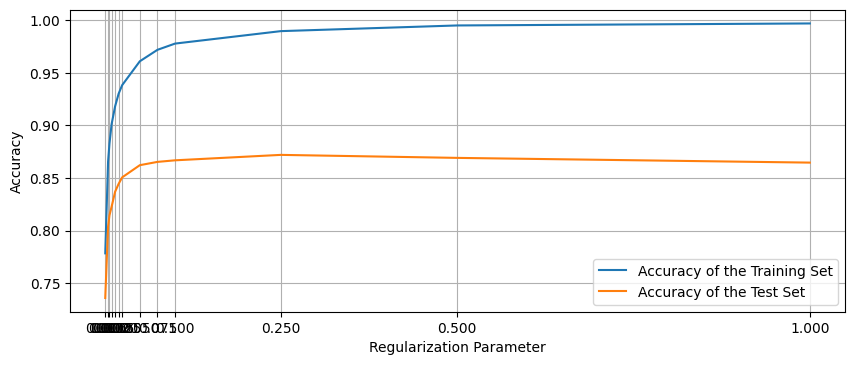

In [27]:
my_dpi = 100 # dots per inch .. (resolution)
plt.figure(figsize=(1000/my_dpi, 400/my_dpi), dpi = my_dpi) # to enlarge the plot (can be omitted)

plt.plot(C, training_accuracy, label = 'Accuracy of the Training Set')
plt.plot(C, test_accuracy, label = 'Accuracy of the Test Set')
plt.ylabel('Accuracy')
plt.xticks(C)
plt.xlabel('Regularization Parameter') 
plt.legend()
plt.grid()

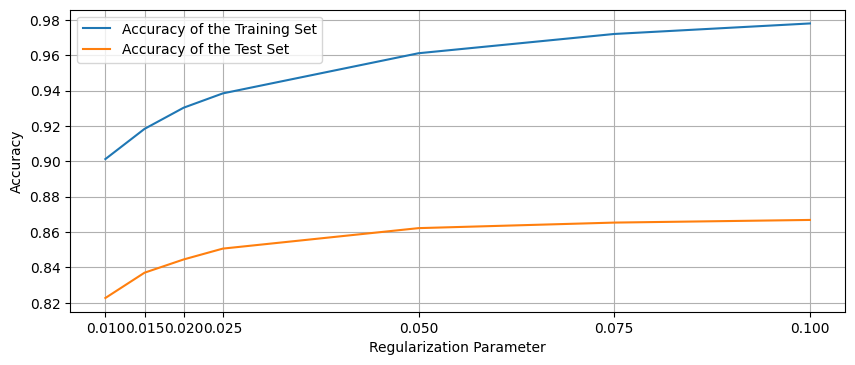

In [28]:
my_dpi = 100 # dots per inch .. (resolution)
plt.figure(figsize=(1000/my_dpi, 400/my_dpi), dpi = my_dpi) # to enlarge the plot (can be omitted)

plt.plot(C[3:10], training_accuracy[3:10], label = 'Accuracy of the Training Set')
plt.plot(C[3:10], test_accuracy[3:10], label = 'Accuracy of the Test Set')
plt.ylabel('Accuracy')
plt.xticks(C[3:10])
plt.xlabel('Regularization Parameter') 
plt.legend()
plt.grid()

In [29]:
clf = OneVsRestClassifier(LinearSVC(C=0.05,max_iter=10000),n_jobs = 1)
clf.fit(Tweet_train,Sentiment_train)
train_acc =accuracy_score(Sentiment_train, clf.predict(Tweet_train))
test_acc = accuracy_score(Sentiment_test, clf.predict(Tweet_test))
print ("Accuracy for training set with regularization parameter C = 0.05 is : %.3f" % (train_acc))
print ("Accuracy for test set with regularization parameter C = 0.05 is : %.3f" % (test_acc))
print ("\n")

Accuracy for training set with regularization parameter C = 0.05 is : 0.961
Accuracy for test set with regularization parameter C = 0.05 is : 0.862




# Making Predictions and Evaluating the Classifier

In [30]:
sentimentdf =  pd.DataFrame( Sentiment_test , columns=['Actual_sentiments'])
sentimentdf.head()

,Actual_sentiments
0,0
1,1
2,0
3,2
4,1


In [31]:
predictions = clf.predict(Tweet_test)
Id = sentimentdf.index
predicted_sentiments = pd.DataFrame(predictions, Id , columns = ['Predicted_sentiments'])
predictions_comparions=sentimentdf.merge(predicted_sentiments, how = 'outer', left_index = True, right_index = True)
predictions_comparions.head(10)

,Actual_sentiments,Predicted_sentiments
0,0,0
1,1,1
2,0,0
3,2,2
4,1,0
5,1,2
6,0,0
7,2,2
8,0,0
9,0,0


# Function to Convert numeric labels to their String equivalent

In [32]:
def convert_sent(number):
    if number == 2 :
        return 'Neutral'
    elif number == 1:
        return 'positive'
    else :
        return 'negetive'

In [33]:
predictions_comparions['Actual_sentiments'] = predictions_comparions['Actual_sentiments'].apply(convert_sent)
predictions_comparions['Predicted_sentiments'] = predictions_comparions['Predicted_sentiments'].apply(convert_sent)
predictions_comparions.head(10)

,Actual_sentiments,Predicted_sentiments
0,negetive,negetive
1,positive,positive
2,negetive,negetive
3,Neutral,Neutral
4,positive,negetive
5,positive,Neutral
6,negetive,negetive
7,Neutral,Neutral
8,negetive,negetive
9,negetive,negetive


In [34]:
predictions_comparions.groupby(['Actual_sentiments']).count()

,Predicted_sentiments
Actual_sentiments,
Neutral,2289
negetive,2406
positive,2642


# Confusion Matrix And calculating Precision Recall and F1 Score

    In the Confusion Matrix : Negetive = 0 ; Positive = 1 ; Neutral = 2 (class Labels)
                Row represents actual Sentiments while the columns represents the predicted sentiments
                
                1st row : 1st column :Actual Sentiment = Negetive ; Predicted Sentiment = Negetive
                1st row : 2nd column :Actual Sentiment = Negetive ; Predicted Sentiment = Positive
                1st row : 3rd column :Actual Sentiment = Negetive ; Predicted Sentiment = Neutral
                
                2nd row : 1st column :Actual Sentiment = Positive ; Predicted Sentiment = Negetive
                2nd row : 2nd column :Actual Sentiment = Positive ; Predicted Sentiment = Positive
                2nd row : 3rd column :Actual Sentiment = Positive ; Predicted Sentiment = Neutral
                
                3rd row : 1st column :Actual Sentiment = Neutral ; Predicted Sentiment = Negetive
                3rd row : 2nd column :Actual Sentiment = Neutral ; Predicted Sentiment = Positive
                3rd row : 3rd column :Actual Sentiment = Neutral ; Predicted Sentiment = Neutral

In [35]:
cm  = confusion_matrix(Sentiment_test,predictions )
print(cm)

[[1973  196  237]
 [ 182 2191  269]
 [  75   52 2162]]


# Precision Recall & F1 Score:

    Precison = True Postive/(Total predicted Positive) || True Postive/(True Positive + False Positive)
               Precision talks about how precise/accurate the model is, i.e. out of total predicted positive,
               how many of them are actual positive.
               
    Recall = True Positive/(Total actual Positive) || True Postive/(True Positive + False Negetive)
             Recall calculates how many of the Actual Positives the model captures by labeling it 
             as Positive (True Positive)
             
    F1 Score = (2 * Precision * Recall) / (Precision + Recall)

In [36]:
precision = precision_score(Sentiment_test, predictions, average='macro')
print('Precision of the Classifier Model : %.3f' % precision)
recall = recall_score(Sentiment_test, predictions, average='macro')
print('Recall of the Classifier Model : %.3f' %recall)
f1 = f1_score(Sentiment_test, predictions, average='macro')
print('F1 Score of the Classifier Model : %.3f' %f1)

Precision of the Classifier Model : 0.864
Recall of the Classifier Model : 0.865
F1 Score of the Classifier Model : 0.862


# PREDICT SENTIMENT FROM CUSTOM TWEETS
    (Tweets not in the dataset , neither in training nor in test set)

    Test case 1:
    "Donald trump , i have no idea how this man became the president of the country #STUPID #WORST_PRESIDENT",
     "@iamrohit you were right ...Kolkata is rightfully called the City of Joy..",
     "Hell yeah,, @Rogerfedrrer win his 20th Grand Slam #legend",
     "The food could not have been more bad, One of the worst restaurant i have dined at , the food teatsed like shit",
     "Machine learning is one of the most intersteing feilds to work on",
     "The movie was a bit boring and not so intersting for me also it was slow, overall it was below average !!! #Chappak",
     "its a sad night for @RealMadridCF we lost the game 2-1, but we will come back stronger next time #Hala_Madrid",
     "@SDER You are a murderer, you deserverd to be punished",
     "Tears of Joy !! Finally, @IndianCricket team are the champions of the world 😍 #WINNERS #WORLDCHAPMPS",
     "THE FOOD WAS Average 😊 😊",
     "THE FOOD WAS Average 😢 😢 ",
     "rest in peace !! #RIP 😢 😢"


In [37]:
User_Tweets = ["Donald trump , i have no idea how this man became the president of the country #STUPID #WORST_PRESIDENT",
             "@iamrohit you were right ...Kolkata is rightfully called the City of Joy..",
             "Hell yeah,, @Rogerfedrrer win his 20th Grand Slam #legend",
             " The food could not have been more bad, One of the worst restaurant i have dined at , the food teatsed like shit",
             "Machine learning is one of the most intersteing feilds to work on",
             "The movie was a bit boring and not so intersting for me also it was slow, overall it was below average !!! #Chappak",
             "its a sad night for @RealMadridCF we lost the game 2-1, but we will come back stronger next time #Hala_Madrid",
             "@SDER You are a murderer, you deserverd to be punished",
             "Tears of Joy !! Finally, @IndianCricket team are the champions of the world 😍 #WINNERS #WORLDCHAPMPS",
             "THE FOOD WAS Average 😊 😊",
             "THE FOOD WAS Average 😢 😢 ",
             "rest in peace !! #RIP 😢 😢" ]

IP_Tweets =  pd.DataFrame (User_Tweets,columns=['Input_Tweets'])

In [38]:
IP_Tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 1 columns):
Input_Tweets    12 non-null object
dtypes: object(1)
memory usage: 176.0+ bytes


In [39]:
IP_Tweets

,Input_Tweets
0,"Donald trump , i have no idea how this man became the president of the country #STUPID #WORST_PRESIDENT"
1,@iamrohit you were right ...Kolkata is rightfully called the City of Joy..
2,"Hell yeah,, @Rogerfedrrer win his 20th Grand Slam #legend"
3,"The food could not have been more bad, One of the worst restaurant i have dined at , the food teatsed like shit"
4,Machine learning is one of the most intersteing feilds to work on
5,"The movie was a bit boring and not so intersting for me also it was slow, overall it was below average !!! #Chappak"
6,"its a sad night for @RealMadridCF we lost the game 2-1, but we will come back stronger next time #Hala_Madrid"
7,"@SDER You are a murderer, you deserverd to be punished"
8,"Tears of Joy !! Finally, @IndianCricket team are the champions of the world 😍 #WINNERS #WORLDCHAPMPS"
9,THE FOOD WAS Average 😊 😊


# Pre Process the tweets and convert them into vectors

In [40]:
IP_Tweets['Input_Tweets'] = IP_Tweets['Input_Tweets'].apply(cleanTxt)
IP_Tweets

,Input_Tweets
0,donald trump i have no idea how this man became the president of the country stupid worstpresident
1,you were right kolkata is rightfully called the city of joy
2,hell yeah win his th grand slam legend
3,the food could not have been more bad one of the worst restaurant i have dined at the food teatsed like shit
4,machine learning is one of the most intersteing feilds to work on
5,the movie was a bit boring and not so intersting for me also it was slow overall it was below average chappak
6,its a sad night for we lost the game but we will come back stronger next time halamadrid
7,you are a murderer you deserverd to be punished
8,tears of joy finally team are the champions of the world 😍 winners worldchapmps
9,the food was average 😊 😊


In [41]:
IP_Tweets['Input_Tweets'] = IP_Tweets['Input_Tweets'].apply(convertEmoji)
IP_Tweets

,Input_Tweets
0,donald trump i have no idea how this man became the president of the country stupid worstpresident
1,you were right kolkata is rightfully called the city of joy
2,hell yeah win his th grand slam legend
3,the food could not have been more bad one of the worst restaurant i have dined at the food teatsed like shit
4,machine learning is one of the most intersteing feilds to work on
5,the movie was a bit boring and not so intersting for me also it was slow overall it was below average chappak
6,its a sad night for we lost the game but we will come back stronger next time halamadrid
7,you are a murderer you deserverd to be punished
8,tears of joy finally team are the champions of the world smiling face with heart eyes winners worldchapmps
9,the food was average smiling face with smiling eyes smiling face with smiling eyes


In [42]:
IP_Tweets['Input_Tweets'] = IP_Tweets['Input_Tweets'].apply(Tokenization)
IP_Tweets

,Input_Tweets
0,donald trump idea man became president country stupid worstpresident
1,right kolkata rightfully called city joy
2,hell yeah win th grand slam legend
3,food could bad one bad restaurant dined food teatsed like shit
4,machine learning one intersteing feilds work
5,movie bit boring intersting also slow overall average chappak
6,sad night lost game come back strong next time halamadrid
7,murderer deserverd punished
8,tears joy finally team champions world smiling face heart eyes winners worldchapmps
9,food average smiling face smiling eyes smiling face smiling eyes


In [43]:
IPtweets_array = IP_Tweets['Input_Tweets'].values
IPtweets_array

array(['donald trump idea man became president country stupid worstpresident',
       'right kolkata rightfully called city joy',
       'hell yeah win th grand slam legend',
       'food could bad one bad restaurant dined food teatsed like shit',
       'machine learning one intersteing feilds work',
       'movie bit boring intersting also slow overall average chappak',
       'sad night lost game come back strong next time halamadrid',
       'murderer deserverd punished',
       'tears joy finally team champions world smiling face heart eyes winners worldchapmps',
       'food average smiling face smiling eyes smiling face smiling eyes',
       'food average crying face crying face',
       'rest peace rip crying face crying face'], dtype=object)

In [44]:
Vectorized_IPTweets = count_vectorizer.transform(IPtweets_array)

# predict Sentiment of these tweets using their coressponding tweet vectors

In [45]:
pred = clf.predict(Vectorized_IPTweets)
pred = pred.tolist() # to covert 0,1,2 to pos neg and nuetral (printing output purpose)

for i in range(len(pred)):
    if(pred[i]==0):
        pred[i]=('Negetive')
    elif(pred[i]==1):
        pred[i]='Positive'
    else:
        pred[i]='Neutral'

# Check Predictions of each given Tweet

In [46]:
for i in range (len(User_Tweets)):
    print("The sentiment for review :\n",User_Tweets[i],"is :\n",pred[i],"\n")

The sentiment for review :
 Donald trump , i have no idea how this man became the president of the country #STUPID #WORST_PRESIDENT is :
 Negetive 

The sentiment for review :
 @iamrohit you were right ...Kolkata is rightfully called the City of Joy.. is :
 Positive 

The sentiment for review :
 Hell yeah,, @Rogerfedrrer win his 20th Grand Slam #legend is :
 Positive 

The sentiment for review :
  The food could not have been more bad, One of the worst restaurant i have dined at , the food teatsed like shit is :
 Negetive 

The sentiment for review :
 Machine learning is one of the most intersteing feilds to work on is :
 Neutral 

The sentiment for review :
 The movie was a bit boring and not so intersting for me also it was slow, overall it was below average !!! #Chappak is :
 Negetive 

The sentiment for review :
 its a sad night for @RealMadridCF we lost the game 2-1, but we will come back stronger next time #Hala_Madrid is :
 Negetive 

The sentiment for review :
 @SDER You are a 